## Cross-set thickness and superelevation analysis
This notebook reads in measured cross-set thickness data and computes a distribution of dune heights and flow depths using empirical relationships of Leclair and Bridge (2001) and Bradley and Venditti (2017).
Using measurements of T1 and T2 channel base, we compute a distribution of possible superelevation values for the estimated depths.

### Install necessary libraries
Uncomment the next cell if library installation is needed.

In [2]:
### Install necessary libraries
# pip install numpy pandas matplotlib seaborn

### Library imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that text is saved as editable text objects
plt.rcParams['font.size'] = 7 # Set default font size
plt.rcParams['pdf.fonttype'] = 42  # Embed fonts as TrueType
plt.rcParams['ps.fonttype'] = 42   # Embed fonts as TrueType
plt.rcParams['font.family'] = 'Helvetica'

### Read in cross-set thickness and paleocurrent data

In [4]:
## Read in paleocurrent data
data = pd.read_excel('../field_data/measurements/bed_thicknesses_and_xsection_paleocurrents.xlsx', sheet_name='set_thicknesses_&_paleocurrents', skiprows=1)
data.head()

,depth_m,xset_thickness_m,grainsize,paleocurrent,depth_m.1,xset_thickness_m.1,grainsize.1,paleocurrent.1,depth_m.2,xset_thickness_m.2,...,grainsize.6,paleocurrent.7,depth_m.8,xset_thickness_m.8,grainsize.7,paleocurrent.8,depth_m.9,xset_thickness_m.9,grainsize.8,paleocurrent.9
0,0.0,NaN,md,NaN,0.0,NaN,NaN,NaN,0.0,0.4,...,m,NaN,0.0,NaN,m,NaN,0.0,NaN,slt,NaN
1,1.5,NaN,md,NaN,0.8,NaN,NaN,NaN,0.4,0.4,...,obsc,NaN,1.1,NaN,md,NaN,1.0,NaN,ped,NaN
2,2.1,NaN,vfs,NaN,1.4,NaN,NaN,NaN,0.6,NaN,...,slt,NaN,2.0,NaN,vf,NaN,2.2,NaN,slt,NaN
3,2.8,NaN,md,NaN,2.4,NaN,NaN,NaN,1.0,0.6,...,f,NaN,2.8,NaN,md,NaN,4.5,NaN,ped,NaN
4,3.1,NaN,pedc,NaN,2.7,NaN,NaN,NaN,1.6,0.5,...,mL,NaN,4.0,NaN,obs,NaN,5.2,0.2,m,NaN


### Create an array of cross-set thicknesses

In [5]:
thickness_columns = [col for col in data.columns if col.startswith('xset_thickness_m')]
thickness_array = np.array([])
for col in thickness_columns:
    non_nan_values = data[col].dropna().values.astype(float)
    thickness_array = np.concatenate([thickness_array, non_nan_values])
print('total cross-set thickness measurements:', len(thickness_array))

total cross-set thickness measurements: 222


### Compute a distribution of possible dune heights and flow depths
Below, we apply the (1) cross-set thickness to dune height relationship of Leclair and Bridge (2001) and (2) dune height to flow depth relationship in shallow rivers of Bradley and Venditti (2017). This results in a distribution of dune height and flow depths base of the 222 cross-set thickness measurements.

In [6]:
d_vals = []
H_vals = []
for t in thickness_array:
        h_vals = [] 
        h_low = 2.2*t
        h_mean = 2.9*t
        h_high = 3.6*t
        h_vals.extend([h_low,h_mean,h_high])
        H_vals.append(h_vals)
        for h_val in h_vals:
            d_low = 2.8*h_val
            d_mean = 3.5*h_val
            d_high = 4.9*h_val
            d_vals.extend([d_low,d_mean,d_high])
H_vals_array = np.asarray(H_vals).flatten()
d_vals_array = np.asarray(d_vals)

print("---------------------------")
print("DUNE HEIGHT")
print(f"minimum dune height: {np.min(H_vals_array):.2f} m")
print(f"maximum dune height: {np.max(H_vals_array):.2f} m")
print(f"median dune height: {np.median(H_vals_array):.2f} m")
print(f"mean dune height: {np.mean(H_vals_array):.2f}")
print(f"standard deviation of mean dune height: {np.std(H_vals_array):.2f} m")

print("---------------------------")
print("DEPTH")
print(f"minimum depth: {np.min(d_vals_array):.2f} m")
print(f"maximum depth: {np.max(d_vals_array):.2f} m")
print(f"median depth: {np.median(d_vals_array):.2f} m")
print(f"mean depth: {np.mean(d_vals_array):.2f}")
print(f"standard deviation of mean depth: {np.std(d_vals_array):.2f} m")

---------------------------
DUNE HEIGHT
minimum dune height: 0.11 m
maximum dune height: 3.60 m
median dune height: 0.58 m
mean dune height: 0.75
standard deviation of mean dune height: 0.67 m
---------------------------
DEPTH
minimum depth: 0.31 m
maximum depth: 17.64 m
median depth: 2.02 m
mean depth: 2.79
standard deviation of mean depth: 2.66 m


### Compute the 50% and 90% confidence intervals for dune height and channel depth

In [7]:
# Calculate 50% and 90% confidence intervals for depth
confidence_interval_50_DH = np.percentile(H_vals_array, [25, 75])
confidence_interval_90_DH = np.percentile(H_vals_array, [5, 95])

In [8]:
# Calculate 50% and 90% confidence intervals for depth
confidence_interval_50_depth = np.percentile(d_vals_array, [25, 75])
confidence_interval_90_depth = np.percentile(d_vals_array, [5, 95])

### Plot the distribution of dune height and corresponding bankfull depths

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


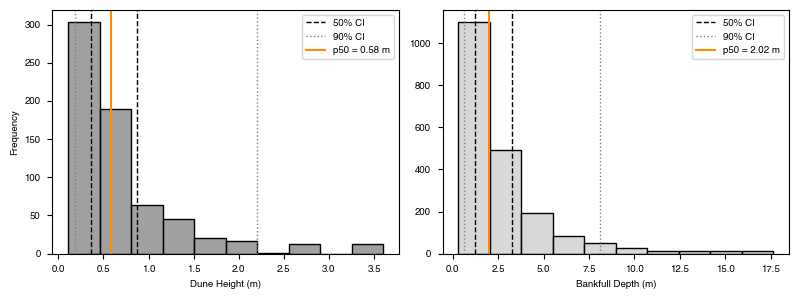

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
sns.histplot(H_vals_array,bins=10, kde=False, color=(0.5, 0.5, 0.5), ax  = ax[0],linewidth=1)
ax[0].axvline(confidence_interval_50_DH[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[0].axvline(confidence_interval_50_DH[1], color='black', linestyle='dashed', linewidth=1)
ax[0].axvline(confidence_interval_90_DH[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[0].axvline(confidence_interval_90_DH[1], color='grey', linestyle='dotted', linewidth=1)
ax[0].axvline(np.percentile(H_vals_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(H_vals_array, 50):.2f} m')
ax[0].set_xlabel('Dune Height (m)')
ax[0].set_ylabel('Frequency')
#ax[0].set_xlim([0,15])
#ax[0].set_xticks([0, 5, 10, 15])

sns.histplot(d_vals_array, bins=10, color = [0.8, 0.8,0.8], ax = ax[1])
ax[1].axvline(confidence_interval_50_depth[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[1].axvline(confidence_interval_50_depth[1], color='black', linestyle='dashed', linewidth=1)
ax[1].axvline(confidence_interval_90_depth[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[1].axvline(confidence_interval_90_depth[1], color='grey', linestyle='dotted', linewidth=1)
ax[1].axvline(np.percentile(d_vals_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(d_vals_array, 50):.2f} m')

#ax[1].set_xticks([-2, -1, 0, 1, 2])
ax[1].set_xlabel('Bankfull Depth (m)')
ax[1].set_ylabel('')

ax[0].legend(fontsize='medium')
ax[1].legend(fontsize='medium')

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3)

for axis in ax:
    # Adjust the padding of the ticks
    axis.tick_params(axis='x', pad=5)
    axis.tick_params(axis='y', pad=5)

plt.tight_layout()

plt.savefig('dune_height_and_depth.pdf', bbox_inches='tight')


## Superelevation analysis
We use the distribution of computed depths and offset between T1 and T2 channel depths (corrected for tectonic tilt) to estimate a liklihood of superelevation.

### Read in channel base measurements
This dataframe contains two elevations of the T1 channel base and one mean elevation of of the floodplain below T2, which we interpret as the T1 floodplain surface.
The elevations in 'measured_m' are the structurally uncorrected values. The values in 'bestfit_m' are the values on the bestfit plane derived from the lidar dataset. 'untilted' are the structurally corrected values

In [10]:
df = pd.read_excel('../field_data/measurements/chb_and_floodplain_elevations_for_SE.xlsx', sheet_name='means')
df['untilted'] = df['measured_m'] - df['bestfit_m']
df.head()

,Name,measured_m,bestfit_m,surface,untilted
0,CB12,1347.55,1294.97,T1_base,52.58
1,CB11,1349.12,1296.51,T1_base,52.61
2,t1_floodplain,1344.97,1291.70,T1_floodplain,53.27


### Compute the structurally corrected offset between the pre-avulsion (T1) channel based and the contemporaneous floodplain 

In [16]:
### Find mean values for T1 channel base and T1 floodplain
chb_t1 = np.mean(df.loc[df['surface'] == 'T1_base', 'measured_m'].values)
chb_t2 = np.mean(df.loc[df['surface'] == 'T1_floodplain', 'measured_m'].values)
total_offset = chb_t1-chb_t2
print(f'the total vertical offset is {total_offset:.2f} m.')

### Find mean values of bestfit plane at same points
chb_t1_bestfit = np.mean(df.loc[df['surface'] == 'T1_base', 'bestfit_m'].values)
chb_t2_bestfit = np.mean(df.loc[df['surface'] == 'T1_floodplain', 'bestfit_m'].values)
offset_due_2_tectonics = chb_t1_bestfit-chb_t2_bestfit
print(f'the vertical offset due to tectonics is {offset_due_2_tectonics:.2f} m.')

### Compute offset of floodplain and pre-avulsion channel base
mean_height_of_chb_over_floodplain = total_offset-offset_due_2_tectonics 
print(f'The pre-avulsion channel base was {mean_height_of_chb_over_floodplain:.2f} m over the floodplain, prior to avulsion.')


the total vertical offset is 3.37 m.
the vertical offset due to tectonics is 4.05 m.
The pre-avulsion channel base was -0.68 m over the floodplain, prior to avulsion.


Thus, we see that the channel base was 0.68 m below the floodplain.

### Compute superelevation  for this distribution of flows
Now we can compute a distribution of superelevation values corresponding to the depths estimated from cross-set thicknesses.
SE = WSE/D (SE = superlevation; WSE = water surface elevation; D = bankfull flow depth)

In [12]:
### Think this is actually what I intended to do
SE = []
for d_val in d_vals_array:
    WSE = mean_height_of_chb_over_floodplain + d_val
    se = WSE/d_val
    SE.append(se)

SE_array = np.asarray(SE)

In [14]:
# Calculate 50% and 90% confidence intervals for SE 
confidence_interval_SE_50 = np.percentile(SE_array, [25, 75])
confidence_interval_SE_90 = np.percentile(SE_array, [5, 95])

# Format and print the confidence intervals with two decimal places
print(f'median SE is: {np.percentile(SE_array, 50):.2f}')
print(f'50% CI is: [{confidence_interval_SE_50[0]:.2f}, {confidence_interval_SE_50[1]:.2f}]')
print(f'90% CI is: [{confidence_interval_SE_90[0]:.2f}, {confidence_interval_SE_90[1]:.2f}]')

median SE is: 0.67
50% CI is: [0.45, 0.79]
90% CI is: [-0.10, 0.92]


### Plot the superelevation

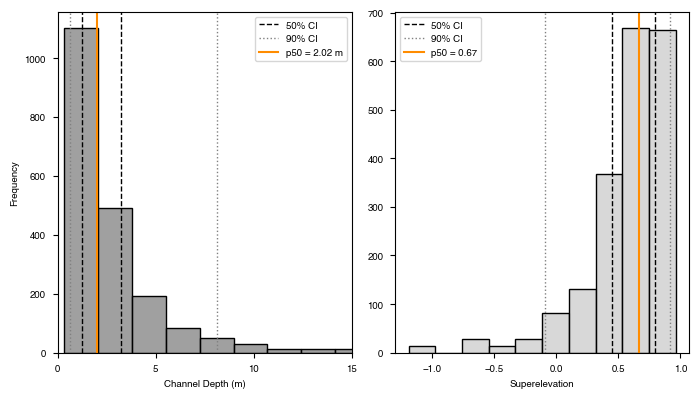

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(7,4))
sns.histplot(d_vals_array,bins=10, kde=False, color=(0.5, 0.5, 0.5), ax  = ax[0],linewidth=1)
ax[0].axvline(confidence_interval_50_depth[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[0].axvline(confidence_interval_50_depth[1], color='black', linestyle='dashed', linewidth=1)
ax[0].axvline(confidence_interval_90_depth[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[0].axvline(confidence_interval_90_depth[1], color='grey', linestyle='dotted', linewidth=1)
ax[0].axvline(np.percentile(d_vals_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(d_vals_array, 50):.2f} m')
ax[0].set_xlabel('Channel Depth (m)')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim([0,15])
ax[0].set_xticks([0, 5, 10, 15])

sns.histplot(SE_array, bins=10, color = [0.8, 0.8,0.8], ax = ax[1])
ax[1].axvline(confidence_interval_SE_50[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[1].axvline(confidence_interval_SE_50[1], color='black', linestyle='dashed', linewidth=1)
ax[1].axvline(confidence_interval_SE_90[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[1].axvline(confidence_interval_SE_90[1], color='grey', linestyle='dotted', linewidth=1)
ax[1].axvline(np.percentile(SE_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(SE_array, 50):.2f}')

#ax[1].set_xticks([-2, -1, 0, 1, 2])
ax[1].set_xlabel('Superelevation')
ax[1].set_ylabel('')

ax[0].legend(fontsize='medium')
ax[1].legend(fontsize='medium')

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3)

for axis in ax:
    # Adjust the padding of the ticks
    axis.tick_params(axis='x', pad=5)
    axis.tick_params(axis='y', pad=5)

plt.tight_layout()


### Note: the below makes the same plot as above, but smaller with white axes labels for use in the paper figure

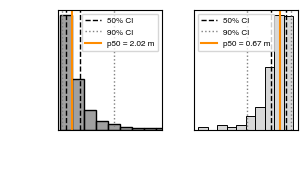

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(3,1.5))
sns.histplot(d_vals_array,bins=10, kde=False, color=(0.5, 0.5, 0.5), ax  = ax[0],linewidth=1)
ax[0].axvline(confidence_interval_50_depth[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[0].axvline(confidence_interval_50_depth[1], color='black', linestyle='dashed', linewidth=1)
ax[0].axvline(confidence_interval_90_depth[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[0].axvline(confidence_interval_90_depth[1], color='grey', linestyle='dotted', linewidth=1)
ax[0].axvline(np.percentile(d_vals_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(d_vals_array, 50):.2f} m')
ax[0].set_xlabel('Channel Depth (m)', color='white')
ax[0].set_ylabel('Frequency', color='white')
ax[0].set_xlim([0,15])
ax[0].set_xticks([0, 5, 10, 15])

sns.histplot(SE_array, bins=10, color = [0.8, 0.8,0.8], ax = ax[1])
ax[1].axvline(confidence_interval_SE_50[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[1].axvline(confidence_interval_SE_50[1], color='black', linestyle='dashed', linewidth=1)
ax[1].axvline(confidence_interval_SE_90[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[1].axvline(confidence_interval_SE_90[1], color='grey', linestyle='dotted', linewidth=1)
ax[1].axvline(np.percentile(SE_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(SE_array, 50):.2f} m')

#ax[1].set_xticks([-2, -1, 0, 1, 2])
ax[1].set_xlabel('Superelevation', color='white')
ax[1].set_ylabel('')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3)

for axis in ax:
    # Adjust the padding of the ticks
    axis.tick_params(axis='x', pad=5)
    axis.tick_params(axis='y', pad=5)
    # Set the color of the axes and ticks to white
    axis.tick_params(axis='x', colors='white')
    axis.tick_params(axis='y', colors='white')
